In [63]:
import string
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter
import plotly.express as px

In [64]:
## DATA PREPROCESSING - CLEANING

In [65]:
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df = pd.read_csv("adult.data",names = colnames, header=None)
df = df[df["workclass"] != '?']
df = df[df["workclass"] != ' ?']
df = df[df["education"] != '?']
df = df[df["marital_status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["occupation"] != ' ?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native_country"] != '?']
df = df[df["native_country"] != ' ?']

In [66]:
## FIRST STORY - 1 VISUALISATION :-

In [67]:
#### HEATMAP visualization to help analyse which attributes should be chosen

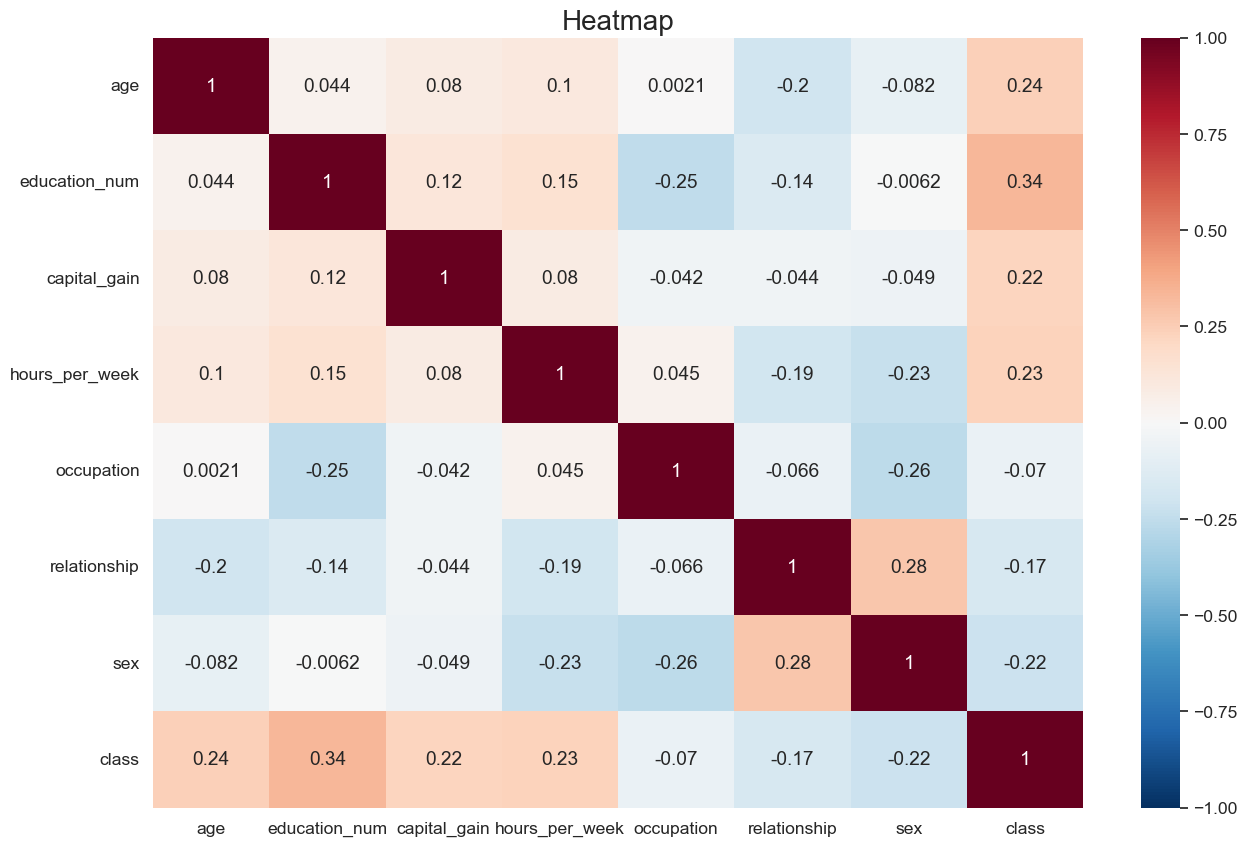

In [68]:
df['class'] = (df["income"].str.contains(">50K"))*1
df1 = df[['age','education_num','capital_gain','hours_per_week','occupation', 'relationship', 'sex', 'class']].copy()
df1['occupation'].replace([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
 ' Other-service', ' Sales', ' Transport-moving', ' Farming-fishing',
 ' Machine-op-inspct', ' Tech-support', ' Craft-repair', ' Protective-serv',
 ' Armed-Forces', ' Priv-house-serv'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)
df1['relationship'].replace([' Not-in-family',' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative'],[0, 1, 2, 3, 4, 5], inplace=True)
df1['sex'].replace([' Male',' Female'],[0, 1], inplace=True)

sns.set(font_scale=1.15)
plt.figure(figsize=(15,10))
sns.heatmap(
    df1.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);
plt.title("Heatmap", fontsize=20)
plt.show()

In [71]:
#### Visualization 1 : PARALLEL COORDINATES PLOT

In [72]:
plt.close()
df['class'] = (df["income"].str.contains(">50K"))*1
frame_pc = df[['age','education_num', 'hours_per_week', 'capital_gain','class']].copy()
frame_np_array = MinMaxScaler().fit_transform(frame_pc.values)
frame_pc = pd.DataFrame(frame_np_array)
frame_pc['income'] = df['income']
frame_pc.columns = ['age','education_num', 'hours_per_week', 'capital_gain','class', 'income']
fig = px.parallel_coordinates(frame_pc, color='class', dimensions=['age','education_num', 'hours_per_week', 'capital_gain'], title="Parallel Coordinates Plot with Pink >50K and Blue <=50K", color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.update_layout(showlegend=False)
fig.show()

In [73]:
## SECOND STORY - 1 VISUALISATION :-

In [74]:
#### Visualization 1 : BOX PLOT

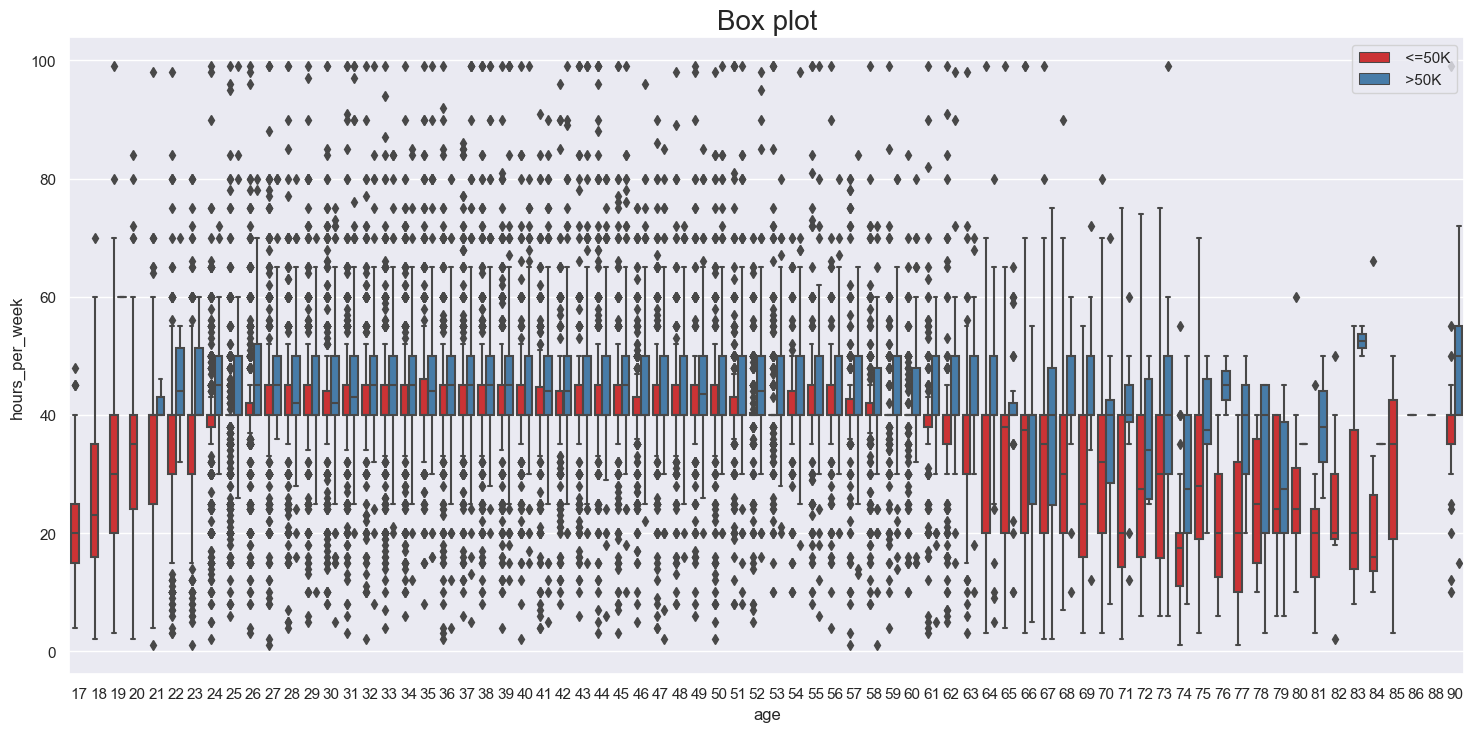

In [75]:
sns.set(rc={'figure.figsize':(18,8.27)})
g = sns.boxplot(
    x='age', 
    y='hours_per_week', 
    data=df,
    palette='Set1',
    hue='income',
    );
g, plt.title("Box plot", fontsize=20)
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

In [76]:
## THIRD STORY - 2 VISUALISATIONS :-

In [77]:
#### Visualization 1 : PIE CHART

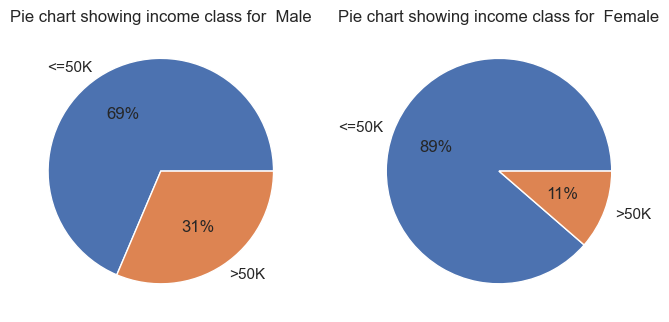

In [78]:

def analyse_categories(column):
    values = df[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8,16))
    for i, val in enumerate(values):
        val_df = df[df[column].str.contains(val)]
        above = val_df[val_df["income"].str.contains(">50K")]
        below = val_df[val_df["income"].str.contains("<=50K")]
        axes[i].pie([len(below.index), len(above.index)], labels=["<=50K", ">50K"], autopct='%1.0f%%')
        axes[i].set_title("Pie chart showing income class for "+val)
    
    plt.show()
    
analyse_categories('sex')

In [79]:
#### Visualization 2 : MOSAIC PLOT

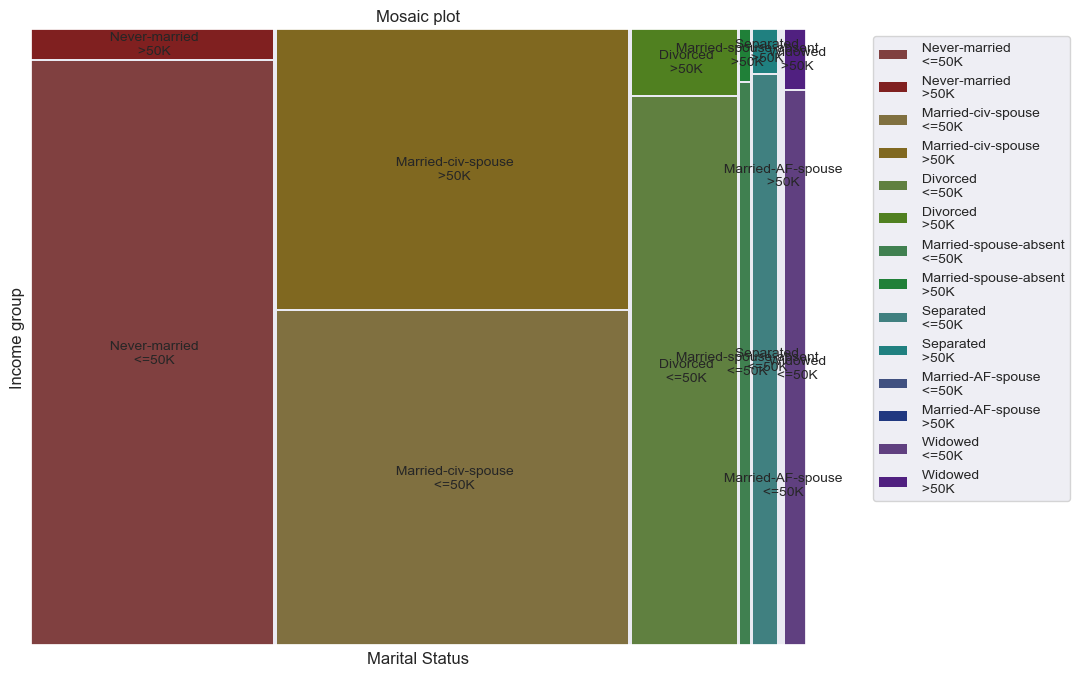

In [80]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
fig.subplots_adjust(hspace=1)
mosaic(df, ['marital_status','income'], ax=axes, axes_label=False)
plt.xlabel("Marital Status")
plt.ylabel("Income group")
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1), fontsize=10)
plt.title("Mosaic plot")
plt.show()

In [81]:
## FOURTH STORY - 2 VISUALISATIONS :-

In [82]:
#### Visualization 1 : KDE PLOT

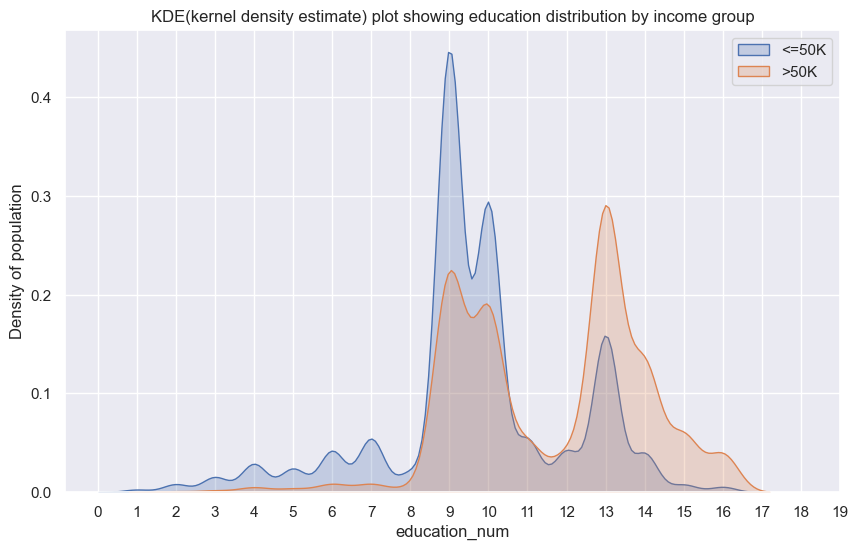

In [83]:
fig = plt.figure(figsize=(10,6))
ax1 = sns.kdeplot(df.loc[df['income']== " <=50K", "education_num"], label = '<=50K', shade=True)
sns.kdeplot(df.loc[df['income']== " >50K", "education_num"], label = '>50K', shade=True, ax=ax1)
plt.xticks(np.arange(0,20,1))
ax1.set_title("KDE(kernel density estimate) plot showing education distribution by income group", loc='center', fontsize=12)
ax1.set_xlabel("education_num")
ax1.set_ylabel("Density of population")
ax1.legend(loc="upper right") 
plt.show()

In [84]:
#### Visualization 2 : BOX PLOT

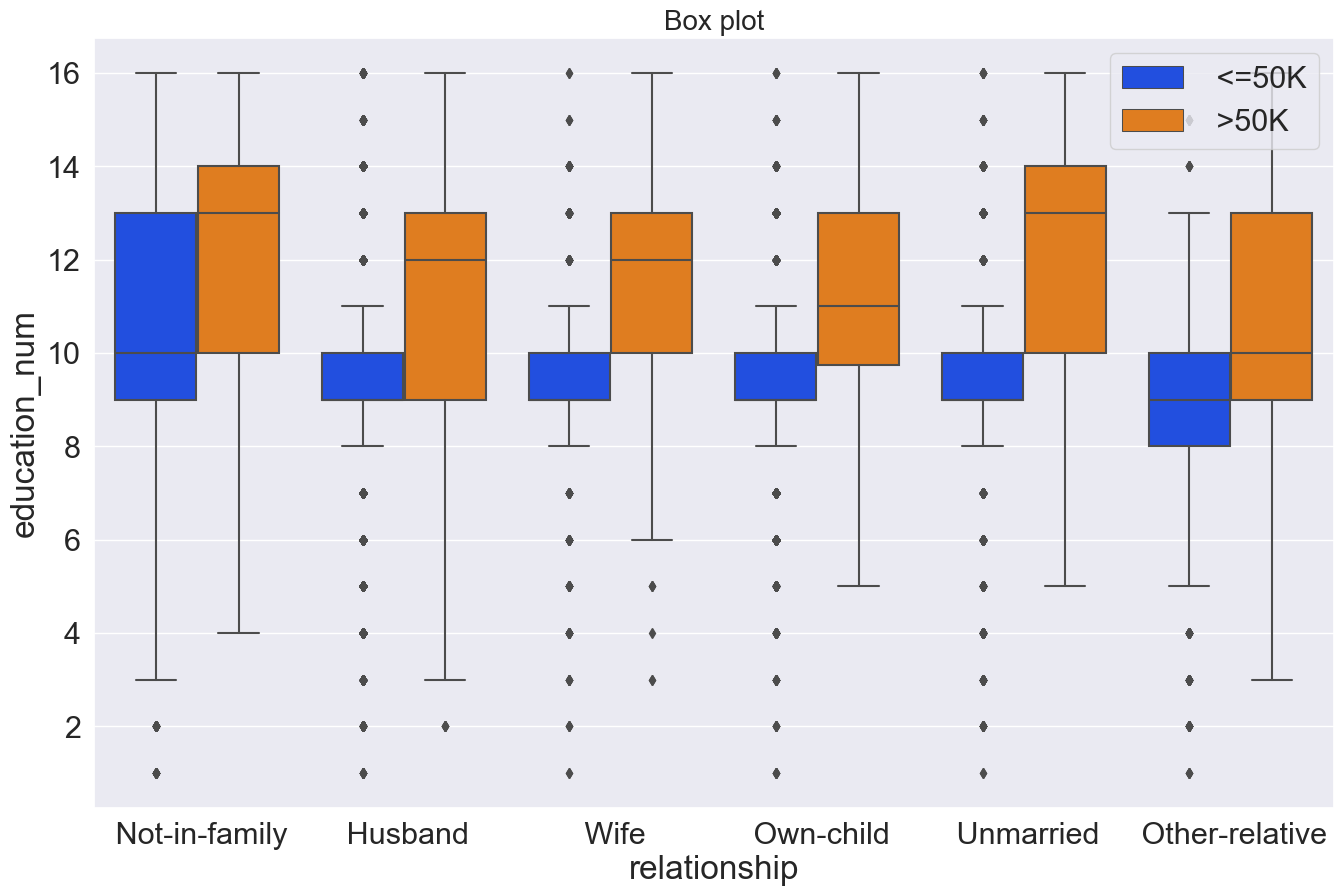

In [85]:
sns.set(rc={'figure.figsize':(16,10)}, font_scale=2)
g = sns.boxplot(
    x='relationship', 
    y='education_num', 
    data=df,
    palette='bright',
    hue='income'
    );
g, plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title("Box plot", fontsize=20)
plt.show()

In [86]:
## FIFTH STORY

In [87]:
#### Visualization 1 : HISTOGRAM PLOT - Male

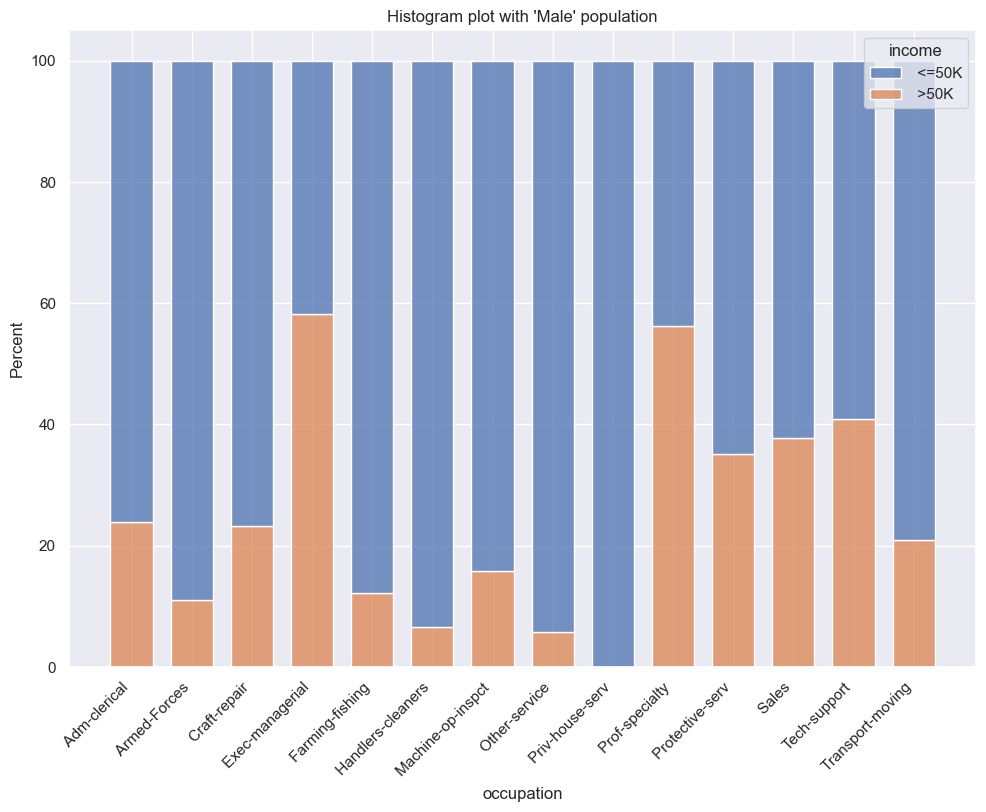

In [88]:
plt.close()
sns.set(rc={'figure.figsize':(11.7,8.27)})
df1 = df[df['sex'].str.contains("Male")]
plot = df1.groupby(['occupation'])['income'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(data=plot,x='occupation', hue = 'income',weights= 'percent',multiple = 'stack',shrink = 0.7)
g.set(ylabel="Percent",xlabel="occupation")
g,plt.xticks(rotation=45, ha='right')
plt.title("Histogram plot with 'Male' population")
plt.show()

In [89]:
#### Visualization 2 : HISTOGRAM PLOT - Female

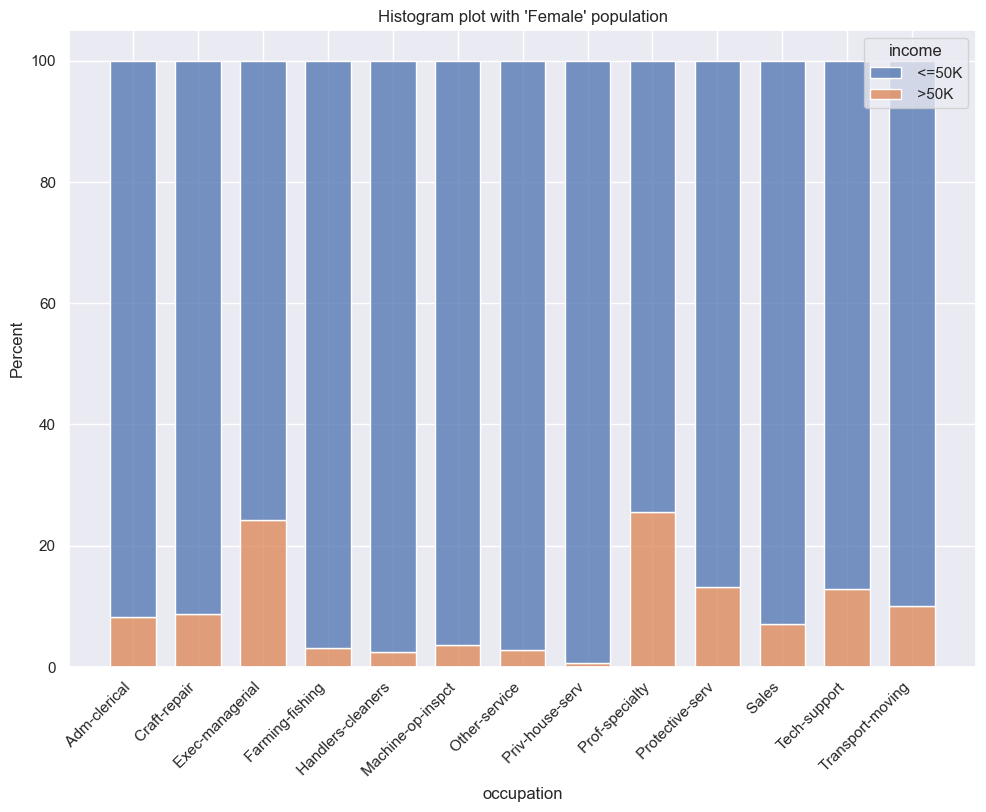

In [90]:
plt.close()
sns.set(rc={'figure.figsize':(11.7,8.27)})
df1 = df[df['sex'].str.contains("Female")]
plot = df1.groupby(['occupation'])['income'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(data=plot,x='occupation', hue = 'income',weights= 'percent',multiple = 'stack',shrink = 0.7)
g.set(ylabel="Percent",xlabel="occupation")
g,plt.xticks(rotation=45, ha='right')
plt.title("Histogram plot with 'Female' population")
plt.show()